#### Цель проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

#### Задача - подготовить, обработать данные из представленного датасета для дальнейшего обучения модели

In [303]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) 
pd.set_option('display.max_columns', 50) 

students = pd.read_csv('stud_math.xls')

In [304]:
students

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,-6.0,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
391,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,-3.0,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
392,MS,M,21,R,GT3,T,1.0,1.0,other,other,course,NaN,1.0,1.0,3.0,NaN,no,no,no,no,-3.0,NaN,no,no,5.0,5.0,3.0,3.0,3.0,35.0
393,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,-3.0,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0


In [305]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [306]:
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
count,395.000000,392.000000,371.000000,367.000000,388.000000,373.000000,388.000000,368.000000,384.000000,387.000000,380.000000,383.000000,389.000000
mean,16.696203,2.750000,2.614555,1.438692,2.038660,0.337802,-6.115979,3.937500,3.231771,3.105943,3.531579,7.279373,52.262211
std,1.276043,1.098127,2.228732,0.694181,0.842078,0.743135,2.526235,0.927277,0.993940,1.115896,1.396019,23.465197,22.919022
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,-12.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,-6.000000,4.000000,3.000000,2.000000,3.000000,0.000000,40.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,-6.000000,4.000000,3.000000,3.000000,4.000000,4.000000,55.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,-3.000000,5.000000,4.000000,4.000000,5.000000,8.000000,70.000000
max,22.000000,4.000000,40.000000,4.000000,4.000000,3.000000,-3.000000,5.000000,5.000000,5.000000,5.000000,385.000000,100.000000


## Создание функций

In [307]:
#Функция для корректировки nan значений
def nan_values(x):
    if pd.isnull(x):
        x = None
    if x == 'nan':
        x = None

In [308]:
#Функция для нахождения выбросов 
def emission(col):
    students[col].hist()
    students[col].describe()
    q1 = students[col].quantile(0.25)
    q3 = students[col].quantile(0.75)
    IQR = q3 - q1 
    sum = 0
    count = 0
    for x in students[col].tolist():
        if pd.isnull(x):
            sum+=1
        count+=1
    perc = round((sum/count)*100)
    return print(
    '25-й перцентиль: {},'.format(q1),
    '75-й перцентиль: {},'.format(q3),
    "IQR: {}, ".format(IQR),
    "Границы выбросов: [{f}, {l}].".format(f=q1 - 1.5*IQR, l=q3 + 1.5*IQR),
    'В столбце {} ({}%) пустых значений'.format(sum,perc))

In [309]:
#Функция для оценки количества уникальных номинативных значений 
def nominate(col):
    count = 0
    sum = 0
    for x in students[col].tolist():
        if pd.isnull(x):
            sum+=1
        count+=1
    display(pd.DataFrame(students[col].value_counts()))
    students.loc[:, [col]].info()
    perc = round((sum/count)*100)
    return print(f'В столбце {col} {sum} ({perc}%) пустых значений')

In [310]:
#Функция для построения графиков плотности распределения переменных
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [311]:
#Функция для определения значимости категориальной переменной
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'], 
                        students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [312]:
#Функция для замены пропусков
def fill_na_values(x):
    for i in students.columns:
        if students[i].dtype == float:
            students[i] = students[i].fillna(students[i].median())
    
        elif students[i].dtype == object:
            students[i] = students[i].fillna(students[i].mode()[0])
    return x

## Обработка данных

In [313]:
col_list = students.columns.tolist()

In [314]:
for col in col_list:
    students[col].apply(nan_values)

### Найдём выбросы для числовых значений

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0]. В столбце 0 (0%) пустых значений


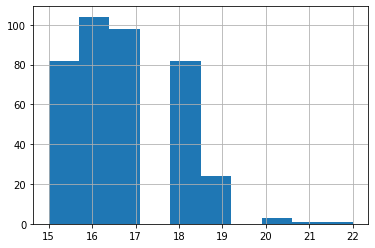

In [315]:
emission('age')
#Фильтровать по выбросам не будем, т.к. все значения соответствуют описанию датасета

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0]. В столбце 3 (1%) пустых значений


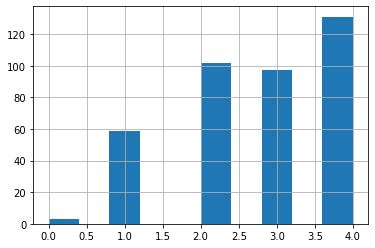

In [316]:
emission('Medu')
#Выбросов нет 

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5]. В столбце 24 (6%) пустых значений


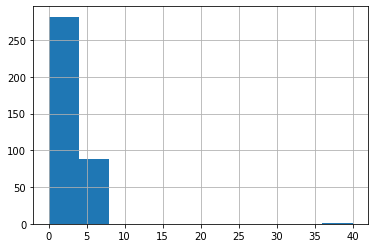

In [317]:
emission('Fedu')
#Есть явный выброс, поэтому фильтруем данные 

In [318]:
#Согласно описанию датасета, поле Medu/Fedu может принимать значение от 1 до 4 
students = students[students.Fedu<=4]

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5]. В столбце 25 (7%) пустых значений


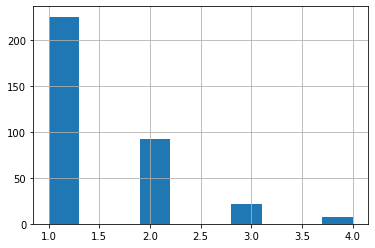

In [319]:
emission('traveltime')
#Выбросов нет (описание датасета позваляет принимать значение от 1 до 4)

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5]. В столбце 7 (2%) пустых значений


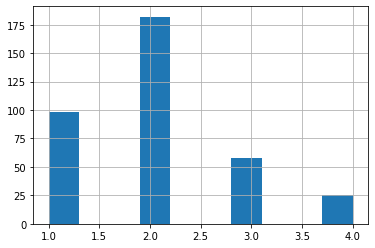

In [320]:
emission('studytime')
#Выбросов нет 

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0]. В столбце 19 (5%) пустых значений


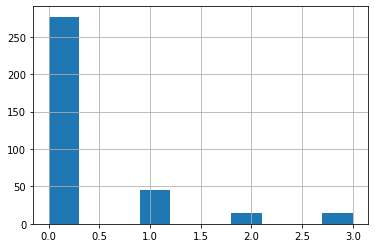

In [321]:
emission('failures')
#Выбросов нет 

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5]. В столбце 7 (2%) пустых значений


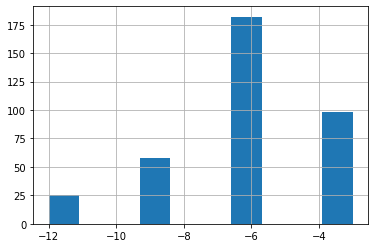

In [322]:
emission('studytime, granular')
#Информации об этом поле нет в описании датасета 

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5]. В столбце 24 (6%) пустых значений


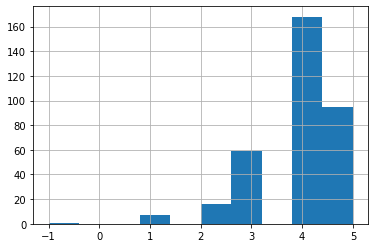

In [323]:
emission('famrel')
#Есть выбросы, т.к. значение может быть от 1 до 5

In [324]:
students = students[students.famrel>=1]

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5]. В столбце 9 (3%) пустых значений


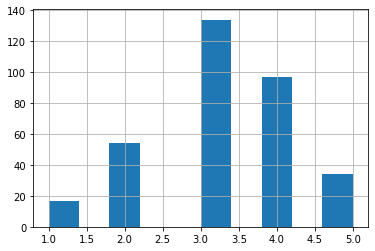

In [325]:
emission('freetime')
#Выбросов нет 

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0]. В столбце 8 (2%) пустых значений


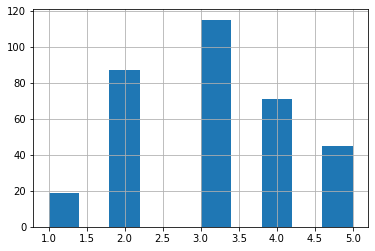

In [326]:
emission('goout')
#Выбросов нет 

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0]. В столбце 13 (4%) пустых значений


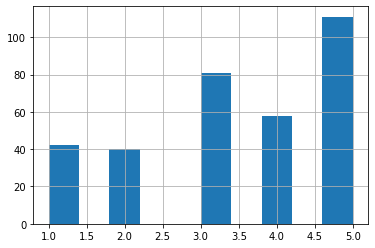

In [327]:
emission('health')
#Выбросов нет

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0]. В столбце 12 (3%) пустых значений


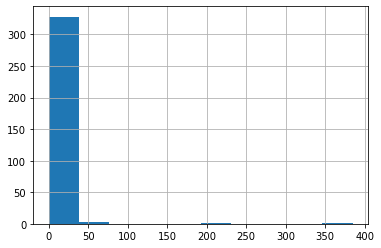

In [328]:
emission('absences')
#Выбросы есть. Необходимо их исключить 

In [329]:
students = students[students.absences<=50]
#Отойдём от показателей IQR и допустим позможность пропуска 50-ти занятий

25-й перцентиль: 43.75, 75-й перцентиль: 65.0, IQR: 21.25,  Границы выбросов: [11.875, 96.875]. В столбце 5 (2%) пустых значений


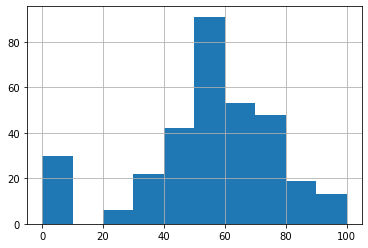

In [330]:
emission('score')
#Выбросов нет. Но для обучения модели с учителем мы не можем допустить отсутствие целевой переменной

In [332]:
students = students.dropna(subset=['score'])

## Анализ данных

In [333]:
nominate('school')

,school
GP,286
MS,38


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  324 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце school 0 (0%) пустых значений


In [334]:
nominate('sex')

,sex
F,174
M,150


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     324 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце sex 0 (0%) пустых значений


In [335]:
nominate('address')

,address
U,243
R,70


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  313 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце address 11 (3%) пустых значений


In [336]:
nominate('famsize')

,famsize
GT3,216
LE3,87


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  303 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце famsize 21 (6%) пустых значений


In [337]:
nominate('Pstatus')

,Pstatus
T,258
A,27


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  285 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце Pstatus 39 (12%) пустых значений


In [338]:
nominate('Mjob')

,Mjob
other,107
services,77
at_home,51
teacher,43
health,29


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    307 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце Mjob 17 (5%) пустых значений


In [339]:
nominate('Fjob')

,Fjob
other,168
services,81
teacher,23
at_home,14
health,10


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    296 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце Fjob 28 (9%) пустых значений


In [340]:
nominate('reason')

,reason
course,107
reputation,87
home,86
other,30


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  310 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце reason 14 (4%) пустых значений


In [341]:
nominate('guardian')

,guardian
mother,205
father,70
other,21


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  296 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце guardian 28 (9%) пустых значений


In [342]:
nominate('schoolsup')

,schoolsup
no,276
yes,39


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  315 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце schoolsup 9 (3%) пустых значений


In [343]:
nominate('famsup')

,famsup
yes,176
no,116


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  292 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце famsup 32 (10%) пустых значений


In [344]:
nominate('paid')

,paid
no,164
yes,127


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    291 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце paid 33 (10%) пустых значений


In [345]:
nominate('activities')

,activities
yes,159
no,153


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  312 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце activities 12 (4%) пустых значений


In [346]:
nominate('nursery')

,nursery
yes,245
no,64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  309 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце nursery 15 (5%) пустых значений


In [347]:
nominate('higher')

,higher
yes,293
no,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  308 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце higher 16 (5%) пустых значений


In [348]:
nominate('internet')

,internet
yes,246
no,48


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  294 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце internet 30 (9%) пустых значений


In [349]:
nominate('romantic')

,romantic
no,197
yes,101


<class 'pandas.core.frame.DataFrame'>
Int64Index: 324 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  298 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB
В столбце romantic 26 (8%) пустых значений


In [350]:
#В каждом столбец не более 12% пропущенных значений. В некоторых пропусков нет 

### Рассмотрим корреляцию значений

In [351]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.136117,-0.151971,0.057772,-0.022724,0.206859,0.022724,0.042907,-0.005718,0.071886,-0.065407,0.190068,-0.140221
Medu,-0.136117,1.000000,0.645981,-0.175482,0.082196,-0.216175,-0.082196,-0.027088,0.007070,0.076267,-0.089622,0.132489,0.196835
Fedu,-0.151971,0.645981,1.000000,-0.176166,-0.000895,-0.252915,0.000895,-0.033502,-0.021258,0.030084,0.004503,0.058893,0.115471
traveltime,0.057772,-0.175482,-0.176166,1.000000,-0.125241,0.055725,0.125241,-0.065732,0.003944,0.005128,-0.010874,-0.029266,-0.067086
studytime,-0.022724,0.082196,-0.000895,-0.125241,1.000000,-0.140576,-1.000000,0.022357,-0.133815,-0.063244,-0.090611,-0.060393,0.112451
failures,0.206859,-0.216175,-0.252915,0.055725,-0.140576,1.000000,0.140576,0.011803,0.104134,0.089241,0.068517,0.112139,-0.309799
"studytime, granular",0.022724,-0.082196,0.000895,0.125241,-1.000000,0.140576,1.000000,-0.022357,0.133815,0.063244,0.090611,0.060393,-0.112451
famrel,0.042907,-0.027088,-0.033502,-0.065732,0.022357,0.011803,-0.022357,1.000000,0.166446,0.075819,0.111956,-0.070560,0.046369
freetime,-0.005718,0.007070,-0.021258,0.003944,-0.133815,0.104134,0.133815,0.166446,1.000000,0.285378,0.091193,-0.018052,0.016346
goout,0.071886,0.076267,0.030084,0.005128,-0.063244,0.089241,0.063244,0.075819,0.285378,1.000000,-0.017711,0.065024,-0.142412


<AxesSubplot:>

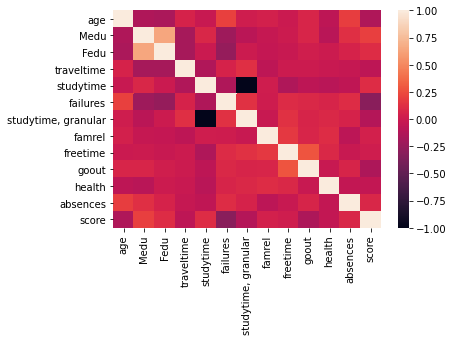

In [352]:
corr = students.corr()
sns.heatmap(corr)

In [290]:
#studytime,granular имеет крайне высокую корреляцию с studytime, к тому же в описании датасета нет информации об этом 
#поле (что оно отображает). Имеет смысл убрать этот столбец

In [353]:
students.drop(['studytime, granular'], inplace = True, axis = 1)

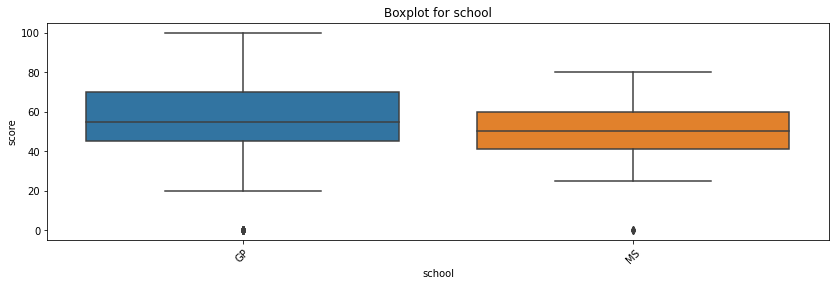

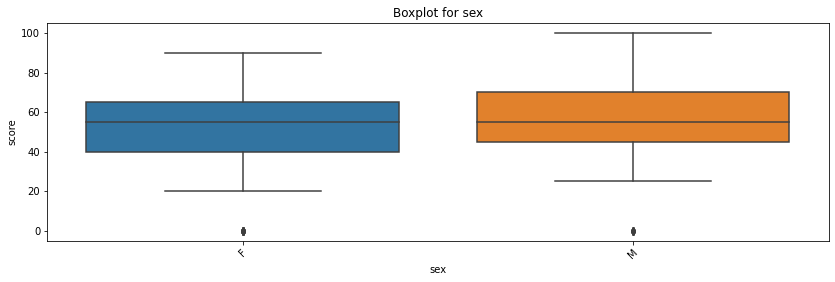

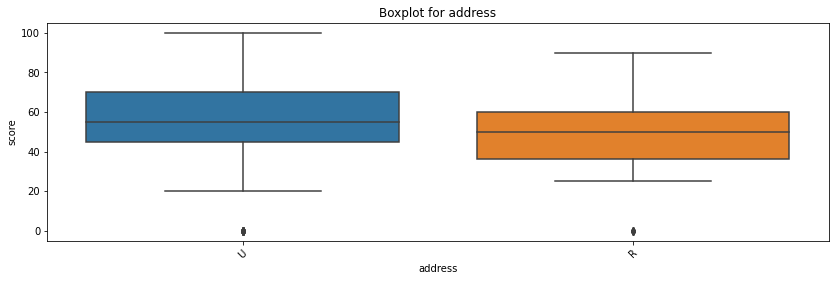

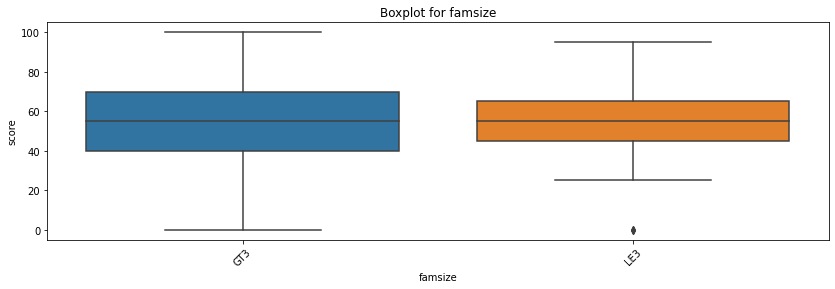

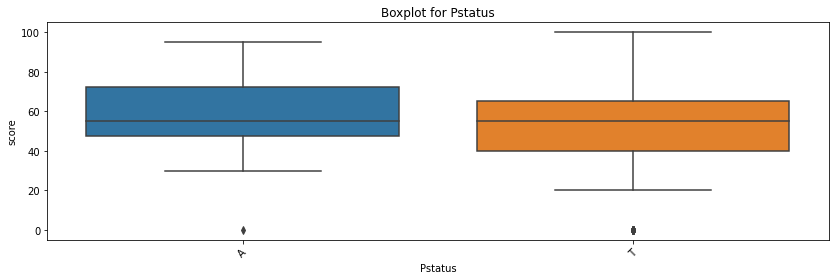

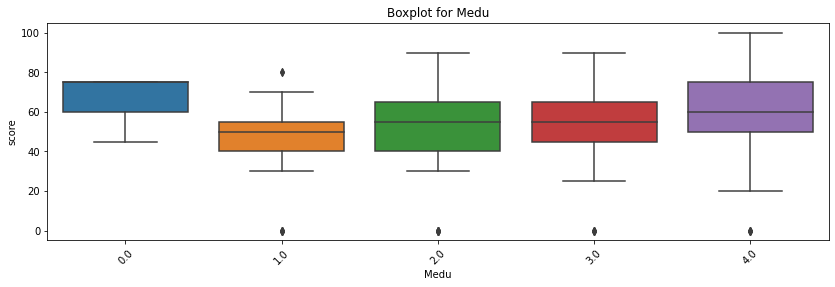

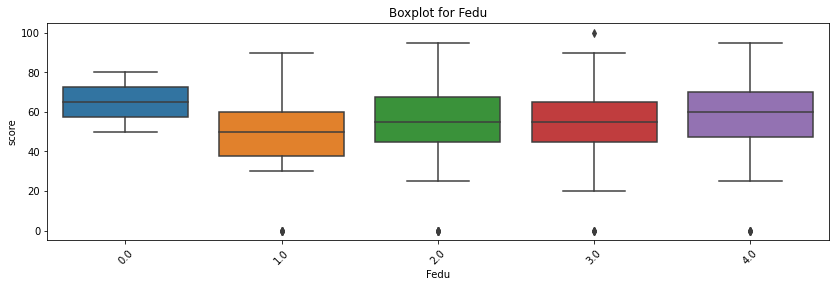

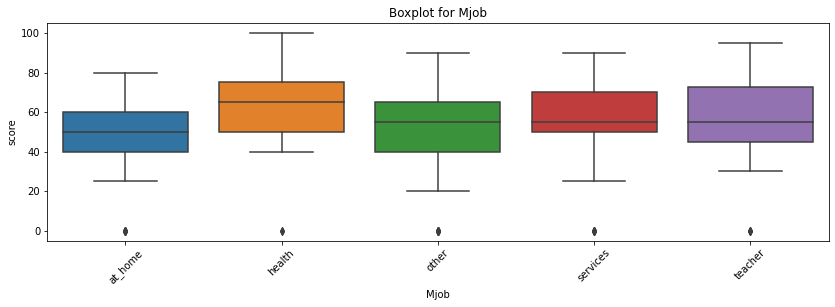

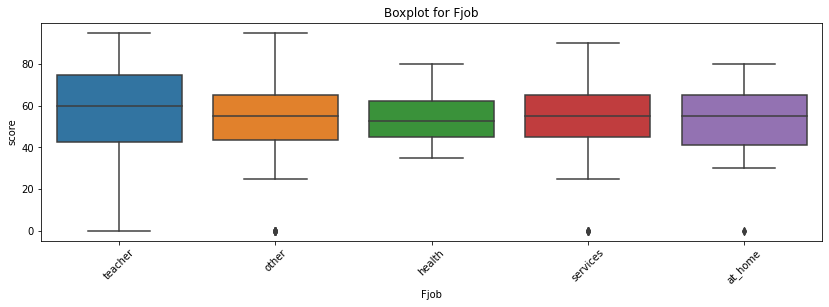

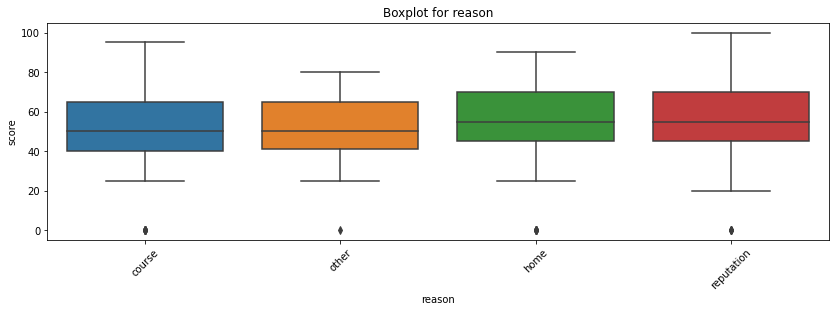

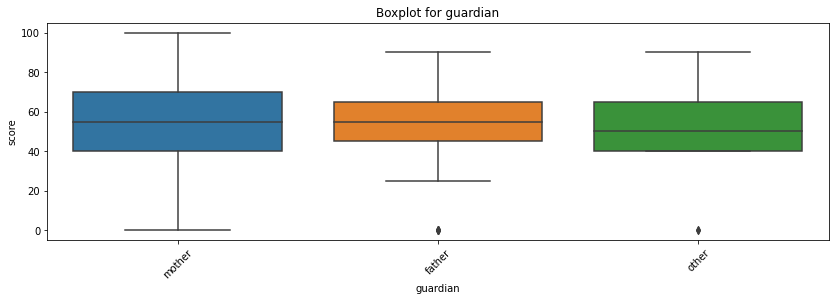

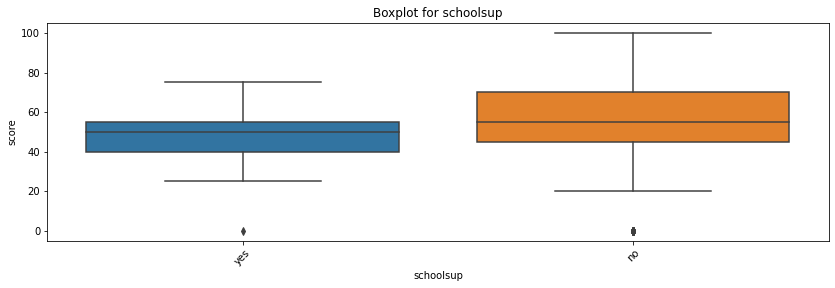

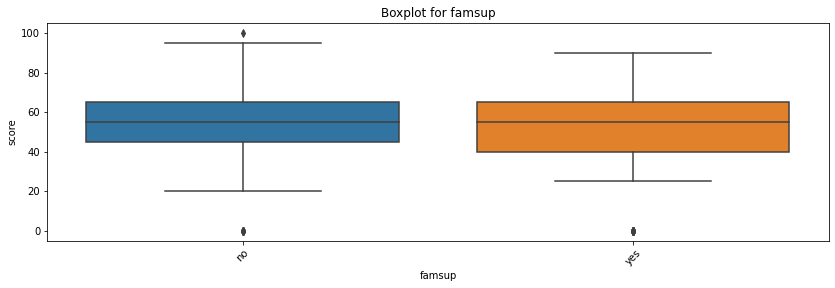

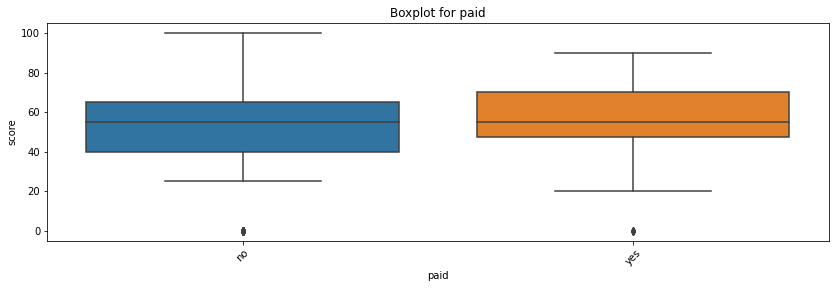

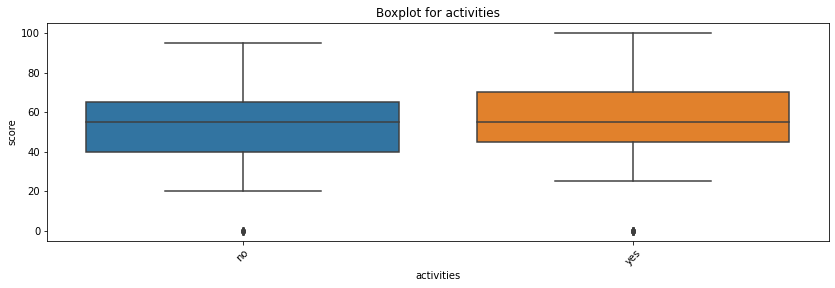

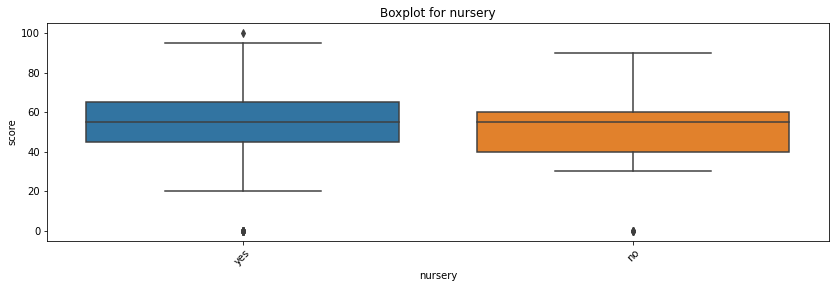

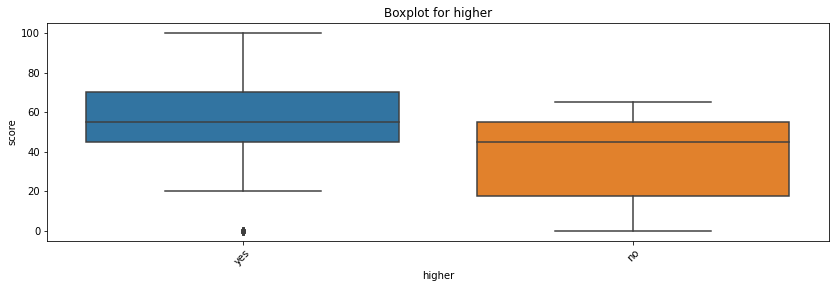

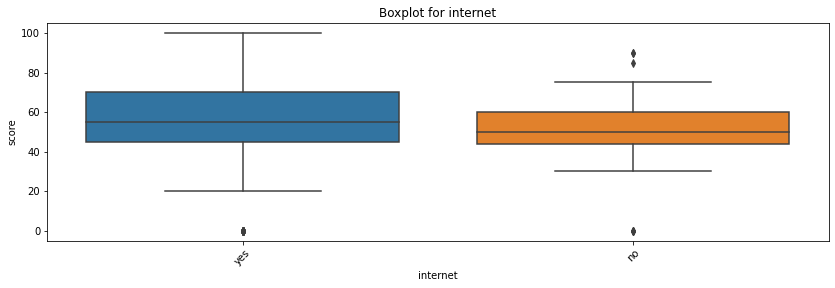

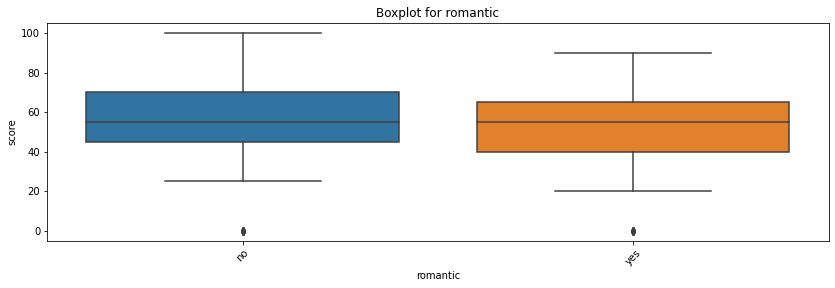

In [354]:
for col in ['school', 'sex', 'address' ,'famsize' ,'Pstatus' ,'Medu' ,'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)
    
#На первый взгляд трудно сказать какие категориальные переменные действительно влияют на целевую переменную

In [293]:
for col in ['school', 'sex', 'address' ,'famsize' ,'Pstatus' ,'Medu' ,'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher


In [355]:
#Исходя из статистики, для дальнейшего обучения модели имеет смысл оставить поля address, Medu, paid, higher

In [356]:
students.drop(['school', 'sex', 'famsize' ,'Pstatus' , 'Fedu',
            'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'activities',
            'nursery', 'internet', 'romantic'],
              inplace = True, axis = 1)

In [357]:
#Так выглядит оставшийся набор полей
students

,age,address,Medu,traveltime,studytime,failures,paid,higher,famrel,freetime,goout,health,absences,score
0,18,U,4.0,2.0,2.0,0.0,no,yes,4.0,3.0,4.0,3.0,6.0,30.0
1,17,U,1.0,1.0,2.0,0.0,no,yes,5.0,3.0,3.0,3.0,4.0,30.0
2,15,U,1.0,1.0,2.0,3.0,NaN,yes,4.0,3.0,2.0,3.0,10.0,50.0
3,15,U,4.0,1.0,3.0,0.0,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,16,U,3.0,1.0,2.0,0.0,yes,yes,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,18,U,1.0,NaN,2.0,1.0,no,yes,1.0,1.0,1.0,5.0,0.0,0.0
391,17,U,3.0,2.0,1.0,0.0,no,yes,2.0,4.0,5.0,2.0,3.0,80.0
392,21,R,1.0,1.0,1.0,3.0,no,NaN,5.0,5.0,3.0,3.0,3.0,35.0
393,18,R,3.0,3.0,1.0,0.0,no,yes,4.0,4.0,1.0,5.0,0.0,50.0


### Заполнение пропущенных значений

In [358]:
new_cols = students.columns.tolist()

In [359]:
for col in new_cols:
    fill_na_values(col)

In [360]:
students

,age,address,Medu,traveltime,studytime,failures,paid,higher,famrel,freetime,goout,health,absences,score
0,18,U,4.0,2.0,2.0,0.0,no,yes,4.0,3.0,4.0,3.0,6.0,30.0
1,17,U,1.0,1.0,2.0,0.0,no,yes,5.0,3.0,3.0,3.0,4.0,30.0
2,15,U,1.0,1.0,2.0,3.0,no,yes,4.0,3.0,2.0,3.0,10.0,50.0
3,15,U,4.0,1.0,3.0,0.0,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,16,U,3.0,1.0,2.0,0.0,yes,yes,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,18,U,1.0,1.0,2.0,1.0,no,yes,1.0,1.0,1.0,5.0,0.0,0.0
391,17,U,3.0,2.0,1.0,0.0,no,yes,2.0,4.0,5.0,2.0,3.0,80.0
392,21,R,1.0,1.0,1.0,3.0,no,yes,5.0,5.0,3.0,3.0,3.0,35.0
393,18,R,3.0,3.0,1.0,0.0,no,yes,4.0,4.0,1.0,5.0,0.0,50.0


In [361]:
#Это итоговый датасет, который в дальнейшем будет использован для обучения модели. 
#После устранения выбросов и пустых значений в нём на 71 строку меньше, чем в исходном датасете. 
#В бОльшей степени данные оказались "чистыми" и пригодными для анализа. 